In [31]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [32]:
START = "2014-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [33]:
data = load_data('TCS.NS')
df=data
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-01,1090.050049,1092.250000,1075.550049,1076.650024,866.627502,529952
1,2014-01-02,1083.000000,1094.500000,1078.074951,1083.500000,872.141357,1726948
2,2014-01-03,1082.349976,1114.550049,1073.625000,1111.099976,894.357117,2618174
3,2014-01-06,1114.500000,1122.000000,1098.500000,1119.800049,901.360046,2311810
4,2014-01-07,1120.000000,1128.224976,1099.500000,1103.074951,887.897583,2897486


In [34]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1090.050049,1092.250000,1075.550049,1076.650024,529952
1,1083.000000,1094.500000,1078.074951,1083.500000,1726948
2,1082.349976,1114.550049,1073.625000,1111.099976,2618174
3,1114.500000,1122.000000,1098.500000,1119.800049,2311810
4,1120.000000,1128.224976,1099.500000,1103.074951,2897486


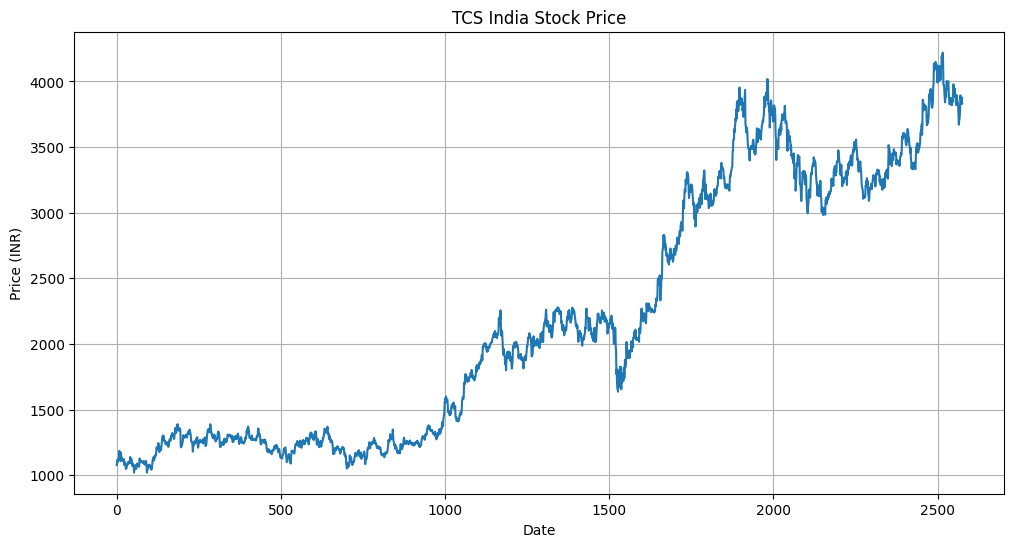

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [36]:
df

,Open,High,Low,Close,Volume
0,1090.050049,1092.250000,1075.550049,1076.650024,529952
1,1083.000000,1094.500000,1078.074951,1083.500000,1726948
2,1082.349976,1114.550049,1073.625000,1111.099976,2618174
3,1114.500000,1122.000000,1098.500000,1119.800049,2311810
4,1120.000000,1128.224976,1099.500000,1103.074951,2897486
...,...,...,...,...,...
2571,3895.000000,3905.899902,3841.899902,3858.699951,1734661
2572,3845.000000,3879.949951,3841.000000,3852.100098,1419898
2573,3874.399902,3893.500000,3827.449951,3831.649902,2177001
2574,3856.800049,3890.000000,3852.000000,3878.149902,1932323


In [37]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
2571    3940.666008
2572    3942.056509
2573    3943.017507
2574    3942.971006
2575    3942.253506
Name: Close, Length: 2576, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

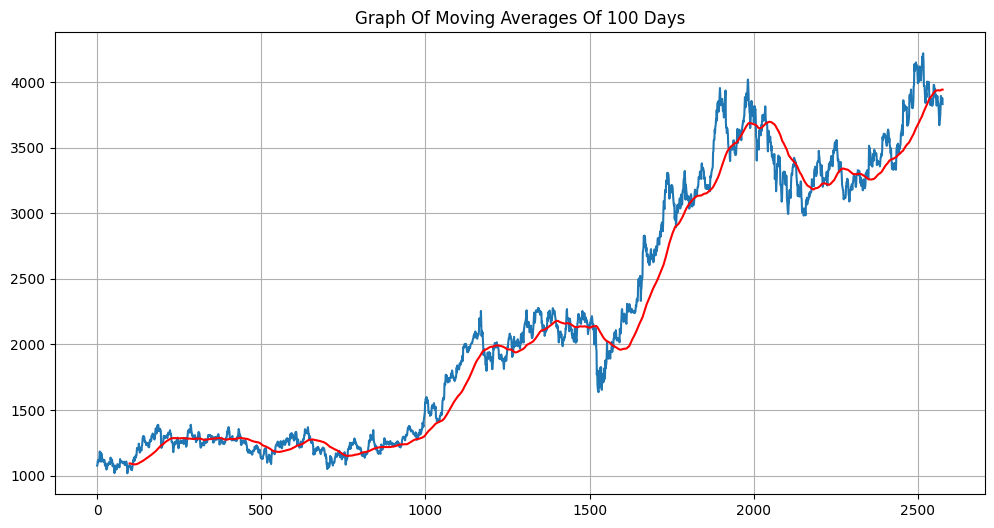

In [38]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

In [39]:
ma200 = df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
2571    3737.486252
2572    3739.497502
2573    3741.363752
2574    3743.575752
2575    3745.900502
Name: Close, Length: 2576, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

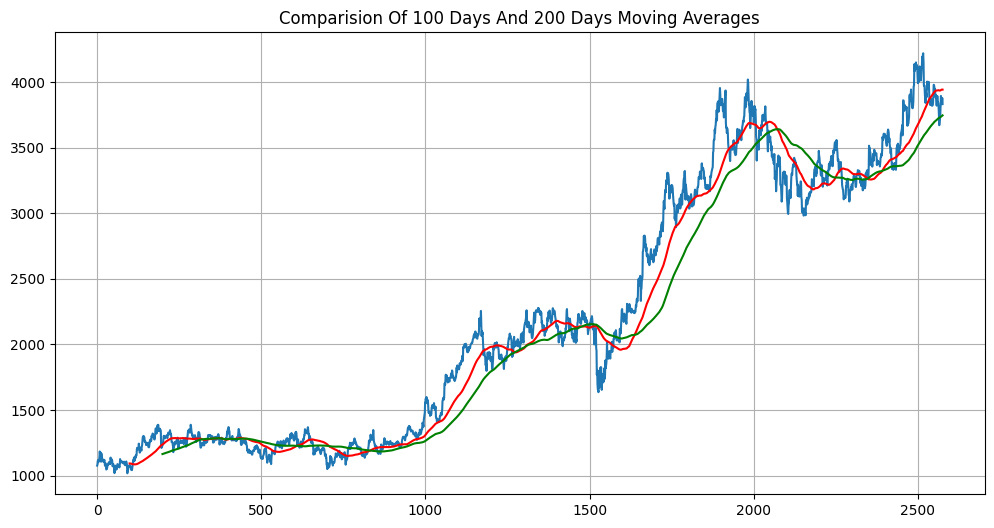

In [40]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [41]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(1803, 7)
(773, 7)


In [42]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-01,1090.050049,1092.250000,1075.550049,1076.650024,866.627502,529952
1,2014-01-02,1083.000000,1094.500000,1078.074951,1083.500000,872.141357,1726948
2,2014-01-03,1082.349976,1114.550049,1073.625000,1111.099976,894.357117,2618174
3,2014-01-06,1114.500000,1122.000000,1098.500000,1119.800049,901.360046,2311810
4,2014-01-07,1120.000000,1128.224976,1099.500000,1103.074951,887.897583,2897486


In [43]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1803,2021-04-30,3099.000000,3132.050049,3020.000000,3035.649902,2838.425049,3072305
1804,2021-05-03,3024.899902,3055.000000,3004.000000,3037.000000,2839.686768,1545831
1805,2021-05-04,3062.800049,3090.000000,3035.000000,3049.750000,2851.608643,1990777
1806,2021-05-05,3070.000000,3099.399902,3052.399902,3095.699951,2894.573486,1939289
1807,2021-05-06,3105.500000,3134.000000,3074.000000,3111.449951,2909.300293,1791671


In [44]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [46]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [47]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.02530494],
       [0.02827815],
       [0.04025782],
       ...,
       [0.91742263],
       [0.91399371],
       [0.91015235]])

In [48]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [49]:
x_train.shape

(1703, 100, 1)

In [50]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [51]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Users\Mrinal\OneDrive\Desktop\Stock-Price-Prediction-using-LSTM-FASTAPI-Streamlit\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 16s 170ms/step - loss: 0.0561 - mean_absolute_error: 0.1697
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - loss: 0.0054 - mean_absolute_error: 0.0500
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 0.0059 - mean_absolute_error: 0.0504
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 126ms/step - loss: 0.0060 - mean_absolute_error: 0.0520
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - loss: 0.0054 - mean_absolute_error: 0.0491
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - loss: 0.0044 - mean_absolute_error: 0.0439
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 128ms/step - loss: 0.0047 - mean_absolute_error: 0.0462
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - loss: 0.0044 - mean_absolute_error: 0.0443
Epoch 9/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - loss: 0.0041 - mean_absolute_error: 0.0429
Epoch 10/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - loss: 0.0046 - mean_absolute_error: 0.0451
Epoch 11/100
54/54

In [54]:
model.save('keras_model.h5')

In [55]:
test_close.shape

(773, 1)

In [56]:
past_100_days = pd.DataFrame(train_close[-100:])

In [57]:
test_df = pd.DataFrame(test_close)

In [58]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [59]:
print(type(past_100_days))


<class 'pandas.core.frame.DataFrame'>


In [60]:
final_df.head()

,0
0,2749.550049
1,2709.449951
2,2727.550049
3,2737.699951
4,2797.300049


In [61]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02655987],
       [0.        ],
       [0.01198841],
       [0.01871109],
       [0.05818658],
       [0.06712816],
       [0.04957617],
       [0.04911256],
       [0.05845145],
       [0.03450795],
       [0.06938005],
       [0.08527619],
       [0.10037756],
       [0.07332093],
       [0.10799447],
       [0.13200427],
       [0.13240174],
       [0.14568151],
       [0.14641015],
       [0.13236859],
       [0.10153666],
       [0.14491988],
       [0.21857199],
       [0.25404029],
       [0.22655321],
       [0.2141675 ],
       [0.2725195 ],
       [0.30931248],
       [0.30825284],
       [0.29772154],
       [0.35849118],
       [0.34699969],
       [0.33931649],
       [0.36511457],
       [0.39697316],
       [0.37382443],
       [0.39319786],
       [0.38538222],
       [0.36534646],
       [0.32262557],
       [0.26619429],
       [0.28473979],
       [0.32719564],
       [0.32494376],
       [0.31726055],
       [0.2970592 ],
       [0.33424966],
       [0.309

In [62]:
input_data.shape

(873, 1)

In [63]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [64]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(773, 100, 1)
(773,)


In [65]:
y_pred = model.predict(x_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step


In [66]:
y_pred.shape

(773, 1)

In [67]:
y_test

array([0.21605507, 0.21694929, 0.22539412, 0.25582858, 0.26626042,
       0.28046757, 0.28881311, 0.2736456 , 0.25046373, 0.22655321,
       0.2386409 , 0.2512585 , 0.24675456, 0.2321831 , 0.24576105,
       0.24642339, 0.26794942, 0.29742352, 0.31166382, 0.28755473,
       0.29785398, 0.29378066, 0.27818253, 0.28599817, 0.28765402,
       0.31378327, 0.32500989, 0.32507619, 0.33603794, 0.37379128,
       0.37548028, 0.3664724 , 0.3741556 , 0.40290107, 0.38935626,
       0.37332768, 0.39193932, 0.36557818, 0.43989278, 0.44466159,
       0.41548551, 0.41820117, 0.42144657, 0.41863163, 0.40800105,
       0.40505367, 0.36617438, 0.37455291, 0.36365746, 0.33030861,
       0.32034053, 0.31666451, 0.33454768, 0.32686447, 0.32146647,
       0.31471064, 0.32875221, 0.33573992, 0.33342173, 0.32328791,
       0.31361769, 0.32345349, 0.32212881, 0.30335143, 0.33775992,
       0.38114315, 0.37389057, 0.38051396, 0.3976355 , 0.40617961,
       0.41359778, 0.42041991, 0.4254206 , 0.49937073, 0.50569

In [68]:
y_pred

array([[0.291515  ],
       [0.2834509 ],
       [0.2732889 ],
       [0.26172322],
       [0.25069684],
       [0.24242449],
       [0.23900639],
       [0.24133609],
       [0.2474228 ],
       [0.25411007],
       [0.25855997],
       [0.259766  ],
       [0.2581748 ],
       [0.25421017],
       [0.24823011],
       [0.24149898],
       [0.23527588],
       [0.2312756 ],
       [0.23157954],
       [0.23714145],
       [0.24614176],
       [0.2562498 ],
       [0.26631868],
       [0.27522343],
       [0.28262863],
       [0.28849858],
       [0.29367784],
       [0.2988166 ],
       [0.30418506],
       [0.30991948],
       [0.31723374],
       [0.32630354],
       [0.3359252 ],
       [0.34521276],
       [0.35528615],
       [0.36518314],
       [0.37210107],
       [0.37607127],
       [0.37593544],
       [0.37743366],
       [0.38294473],
       [0.39035743],
       [0.398008  ],
       [0.4045611 ],
       [0.4090109 ],
       [0.4102394 ],
       [0.40817598],
       [0.401

In [69]:
scaler.scale_

array([0.00066234])

In [70]:
scale_factor = 1/0.00080828
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

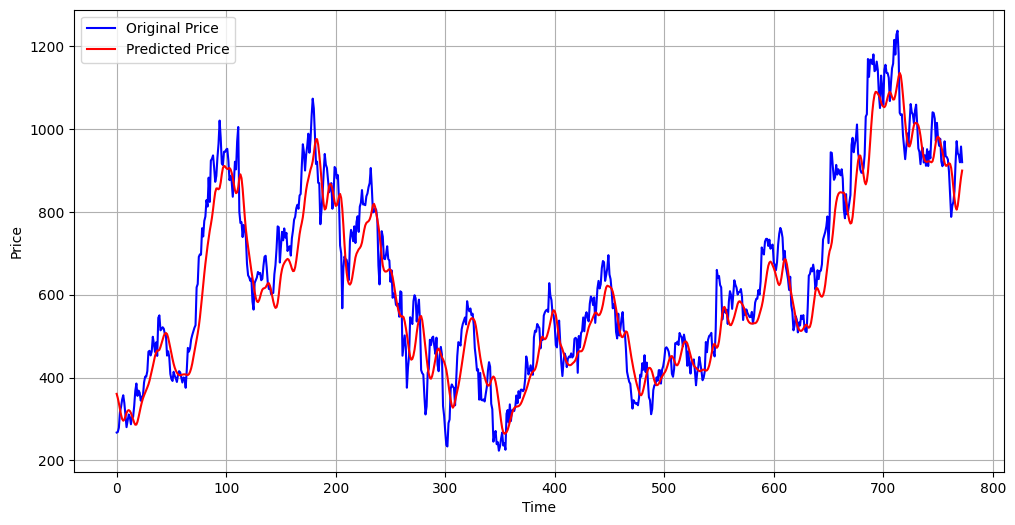

In [71]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [72]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 8.92%


In [73]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9009694552312665


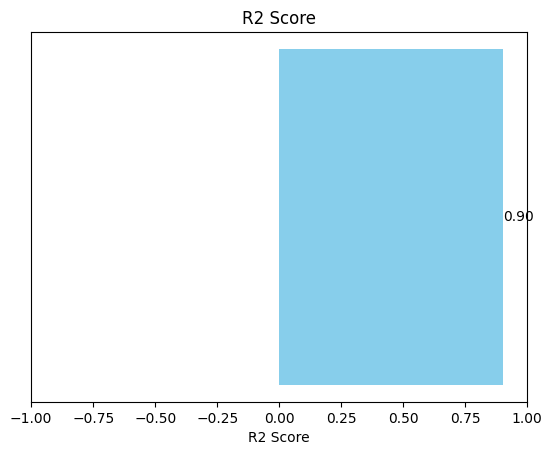

In [74]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

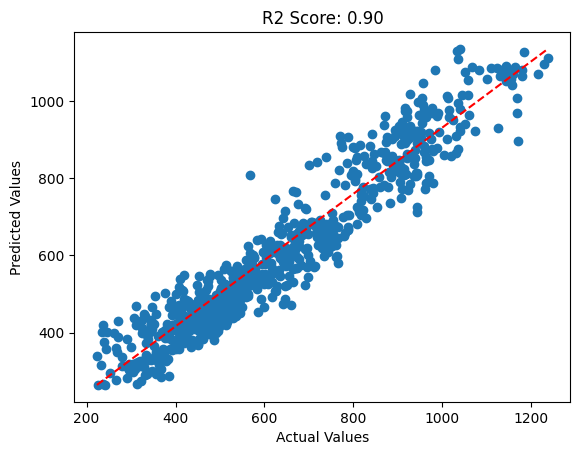

In [75]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()